# Imports 

# Conditions

| Model               | FiveVTS | Chickenpox | Pedalme | Wikimath | Windmillsmall | MontevideoBus |
|---------------------|---------|------------|---------|----------|---------------|---------------|
| Max iter.           | 30      | 30         | 30      | 30       | 30            | 30            |
| Epochs              | 50      | 50         | 50      | 50       | 50            | 50            |
| Lags                | 2       | 4          | 4       | 8        | 8             | 4             |
| Interpolation       | linear  | linear     | nearest | linear   | linear        | nearest       |
| Filters             |         |            |         |          |               |               |
| GConvGRU            | 12      | 16         | 12      | 12       | 12            | 12            |
| GConvLSTM           | 12      | 32         | 2       | 64       | 16            | 12            |
| GCLSTM              | 4       | 16         | 4       | 64       | 16            | 12            |
| LRGCN               | 4       | 8          | 8       | 32       | 12            | 2             |
| DyGrEncoder         | 12      | 12         | 12      | 12       | 12            | 12            |
| EvolveGCNH          | No need | No need    | No need | No need  | No need       | No need       |
| EvolveGCNO          | No need | No need    | No need | No need  | No need       | No need       |
| TGCN                | 12      | 12         | 12      | 12       | 12            | 8             |
| DCRNN               | 2       | 16         | 8       | 12       | 4             | 12            |


# Import

In [132]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import pickle

import plotly.io as pio

In [133]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# Data & 사용자정의함수

In [134]:
df_dataset = pd.DataFrame({
    'dataset':['fivenodes','chickenpox','pedalme','wikimath','windmillsmall','monte'],
    'node':[5,20,15,1068,11,675],
    'time':[200,522,36,731,17472,744]
})
df = pd.read_csv('./Body_Results.csv').iloc[:,1:].merge(df_dataset)

In [243]:
df.head()

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model,node,time
0,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.729374,80.985221,GConvGRU,5,200
1,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.729082,80.891788,GConvGRU,5,200
2,fivenodes,IT-STGCN,0.0,NaN,2,12.0,NaN,50.0,0.731600,114.492592,GConvGRU,5,200
3,fivenodes,IT-STGCN,0.0,NaN,2,12.0,NaN,50.0,0.735026,115.544274,GConvGRU,5,200
4,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.727182,102.783140,GConvGRU,5,200


In [268]:
def show_experiment_spec(df):
    df_cols = ['method','mrate','mtype','lags','nof_filters','inter_method','epoch','model']
    for dataset in df.dataset.unique():
        print(f'dataset: {dataset}')
        for col in df_cols: 
            print(f'{col}: {df[df['dataset'] == dataset][col].unique().tolist()}')
        print('---')

`-` 데이터세트별 실험셋팅 

In [269]:
show_experiment_spec(df)

dataset: fivenodes
method: ['STGCN', 'IT-STGCN', 'GNAR']
mrate: [0.0, 0.7, 0.8, 0.3, 0.5, 0.6, 0.125]
mtype: [nan, 'rand', 'block']
lags: [2]
nof_filters: [12.0, 4.0, 2.0, nan]
inter_method: [nan, 'linear']
epoch: [50.0, nan]
model: ['GConvGRU', 'GConvLSTM', 'GCLSTM', 'DCRNN', 'LRGCN', 'TGCN', 'EvolveGCNO', 'DyGrEncoder', 'EvolveGCNH', 'GNAR']
---
dataset: chickenpox
method: ['STGCN', 'IT-STGCN', 'GNAR']
mrate: [0.0, 0.3, 0.8, 0.5, 0.6, 0.2877697841726618]
mtype: [nan, 'rand', 'block']
lags: [4]
nof_filters: [16.0, 32.0, 8.0, 12.0, nan]
inter_method: [nan, 'linear']
epoch: [50.0, nan]
model: ['GConvGRU', 'GConvLSTM', 'GCLSTM', 'DCRNN', 'LRGCN', 'TGCN', 'EvolveGCNO', 'DyGrEncoder', 'EvolveGCNH', 'GNAR']
---
dataset: pedalme
method: ['STGCN', 'IT-STGCN', 'GNAR']
mrate: [0.0, 0.3, 0.6, 0.5, 0.8, 0.2857142857142857]
mtype: [nan, 'rand', 'block']
lags: [4]
nof_filters: [12.0, 2.0, 4.0, 8.0, nan]
inter_method: [nan, 'nearest', 'linear']
epoch: [50.0, nan]
model: ['GConvGRU', 'GConvLSTM', 'GC

# 시각화1: MissingRate (본문)

In [285]:
df_query = df.query("mtype=='rand' or mtype.isna()").query("dataset == 'wikimath'").query("model == 'GConvLSTM'")
show_experiment_spec(df_query)

dataset: wikimath
method: ['STGCN', 'IT-STGCN']
mrate: [0.3, 0.8, 0.0, 0.5, 0.6]
mtype: ['rand', nan]
lags: [8]
nof_filters: [64.0]
inter_method: ['linear', nan]
epoch: [50.0]
model: ['GConvLSTM']
---


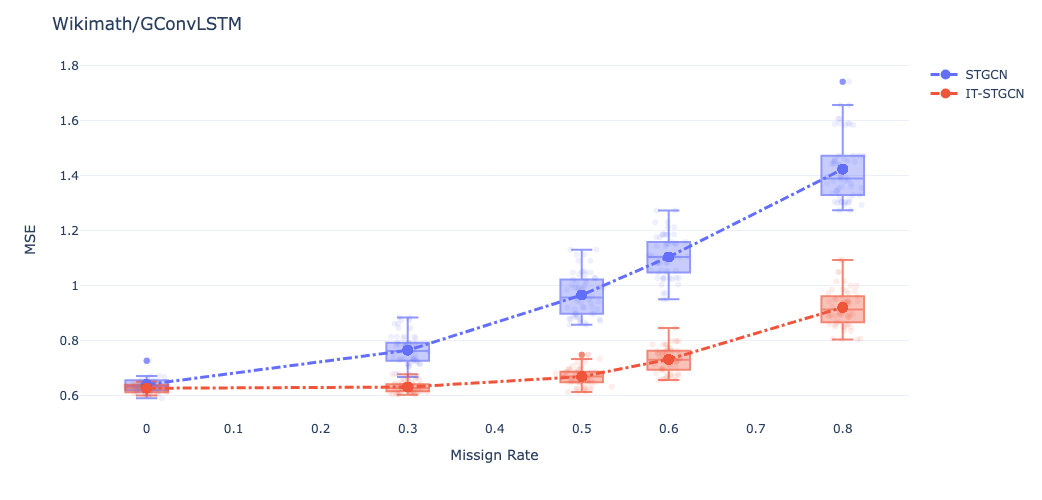

In [286]:
big = df_query.sort_values(by='mrate')\
.assign(mrate_jittered = lambda df: np.array(df['mrate'])+np.random.randn(len(df['mrate']))*0.01)
small = big.groupby(["dataset","mrate","method"]).agg({'mse':'mean'}).reset_index().rename({'mse':'mse_mean'},axis=1)
tidydata = big.merge(small)
fig = px.scatter(
    tidydata,
    y='mse',
    x='mrate_jittered',
    opacity=0.1,
    color='method',
    width=850,
    height=500,
)
_fig1 = px.scatter(
    tidydata,
    y='mse_mean',
    x='mrate',
    color='method',
)
_fig1.data[0]['mode']='markers+lines'
_fig1.data[0]['marker']['size'] = 10
_fig1.data[0]['line']['width'] = 3
_fig1.data[0]['line']['dash'] = 'dashdot'
_fig1.data[1]['mode']='markers+lines'
_fig1.data[1]['marker']['size'] = 10
_fig1.data[1]['line']['width'] = 3
_fig1.data[1]['line']['dash'] = 'dashdot'
_fig2 = px.box(
    tidydata.query("method=='STGCN'"),
    y='mse',
    x='mrate',
)
_fig2.data[0]['opacity']=0.7
_fig2.data[0]['marker']['color']='#636efa'
_fig3 = px.box(
    tidydata.query("method=='IT-STGCN'"),
    y='mse',
    x='mrate',
)
_fig3.data[0]['opacity']=0.7
_fig3.data[0]['marker']['color']='#EF553B'
_fig3
for g in _fig1.data:
    fig.add_trace(g)
for g in _fig2.data:
    fig.add_trace(g)
for g in _fig3.data:
    fig.add_trace(g)
fig.data[0]['showlegend'] =False
fig.data[1]['showlegend'] =False
fig.layout['xaxis']['title']['text']='Missign Rate'
fig.layout['yaxis']['title']['text']='MSE'
fig.layout['legend']['title']['text']=""
fig.layout['title']['text']='Wikimath/GConvLSTM'
fig

# 시각화2: MissingRate (부록)

In [288]:
df_query = df.query("mtype=='rand'").query("method != 'GNAR'").query("dataset != 'fivenodes'")
show_experiment_spec(df_query)

dataset: chickenpox
method: ['STGCN', 'IT-STGCN']
mrate: [0.3, 0.8, 0.5, 0.6]
mtype: ['rand']
lags: [4]
nof_filters: [16.0, 32.0, 8.0, 12.0]
inter_method: ['linear']
epoch: [50.0]
model: ['GConvGRU', 'GConvLSTM', 'GCLSTM', 'LRGCN', 'DyGrEncoder', 'EvolveGCNH', 'EvolveGCNO', 'TGCN', 'DCRNN']
---
dataset: pedalme
method: ['STGCN', 'IT-STGCN']
mrate: [0.3, 0.6, 0.5, 0.8]
mtype: ['rand']
lags: [4]
nof_filters: [12.0, 2.0, 4.0, 8.0]
inter_method: ['nearest']
epoch: [50.0]
model: ['GConvGRU', 'GConvLSTM', 'GCLSTM', 'LRGCN', 'DyGrEncoder', 'EvolveGCNH', 'EvolveGCNO', 'TGCN', 'DCRNN']
---
dataset: wikimath
method: ['STGCN', 'IT-STGCN']
mrate: [0.3, 0.8, 0.5, 0.6]
mtype: ['rand']
lags: [8]
nof_filters: [12.0, 64.0, 32.0]
inter_method: ['linear']
epoch: [50.0]
model: ['GConvGRU', 'GConvLSTM', 'GCLSTM', 'DCRNN', 'LRGCN', 'TGCN', 'EvolveGCNO', 'DyGrEncoder', 'EvolveGCNH']
---
dataset: windmillsmall
method: ['STGCN', 'IT-STGCN']
mrate: [0.7]
mtype: ['rand']
lags: [8]
nof_filters: [12.0, 16.0, 4.0]


In [289]:
df_query.groupby(["method","dataset","mrate","model","nof_filters"]).agg({'mse':'mean'}).reset_index()\
.groupby(["method","dataset","mrate","model"]).agg({'mse':'min'}).reset_index()

,method,dataset,mrate,model,mse
0,IT-STGCN,chickenpox,0.3,DCRNN,0.797419
1,IT-STGCN,chickenpox,0.3,DyGrEncoder,0.868201
2,IT-STGCN,chickenpox,0.3,EvolveGCNH,1.011366
3,IT-STGCN,chickenpox,0.3,EvolveGCNO,0.998463
4,IT-STGCN,chickenpox,0.3,GCLSTM,0.850174
...,...,...,...,...,...
301,STGCN,windmillsmall,0.7,GCLSTM,1.364196
302,STGCN,windmillsmall,0.7,GConvGRU,1.661889
303,STGCN,windmillsmall,0.7,GConvLSTM,1.599078
304,STGCN,windmillsmall,0.7,LRGCN,1.491797


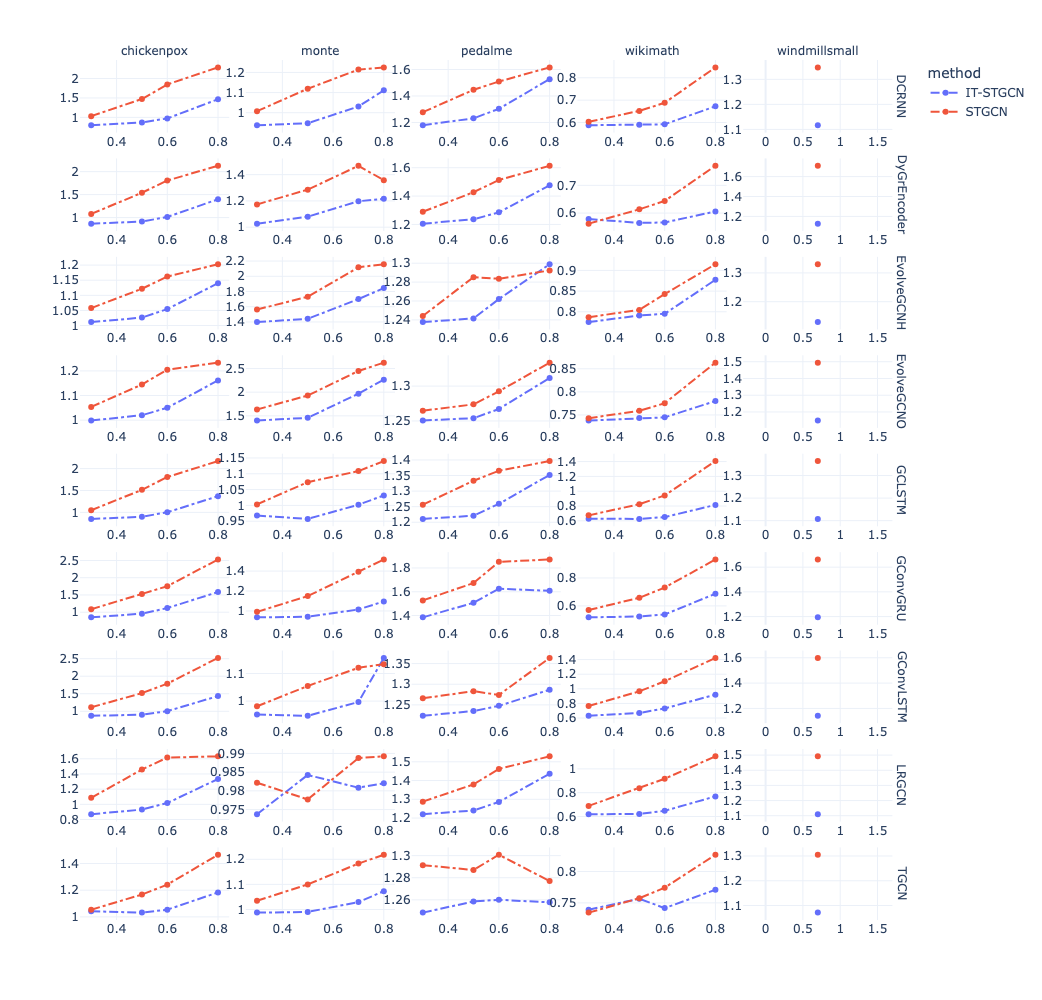

In [290]:
tidydata = df_query.groupby(["method","dataset","mrate","model","nof_filters"]).agg({'mse':'mean'}).reset_index()\
.groupby(["method","dataset","mrate","model"]).agg({'mse':'min'}).reset_index()
#---#
fig = px.line(
    tidydata,
    x='mrate',
    y='mse',
    color='method',
    facet_row='model',
    facet_col='dataset',
    width=850,
    height=1000,
    
)
for scatter in fig.data:
    scatter['mode'] = 'lines+markers'
    scatter['line']['dash'] = 'dashdot'
for annotation in fig.layout['annotations']:
    annotation['text'] = annotation['text'].replace('dataset=','')
    annotation['text'] = annotation['text'].replace('model=','')
for k in [k for k in fig.layout if 'xaxis' in k]:
    fig.layout[k]['title']['text'] = None 
for k in [k for k in fig.layout if 'yaxis' in k]:
    fig.layout[k]['title']['text'] = None 
fig.update_yaxes(showticklabels=True,matches=None)
fig.update_xaxes(showticklabels=True,matches=None)

# 시각화3

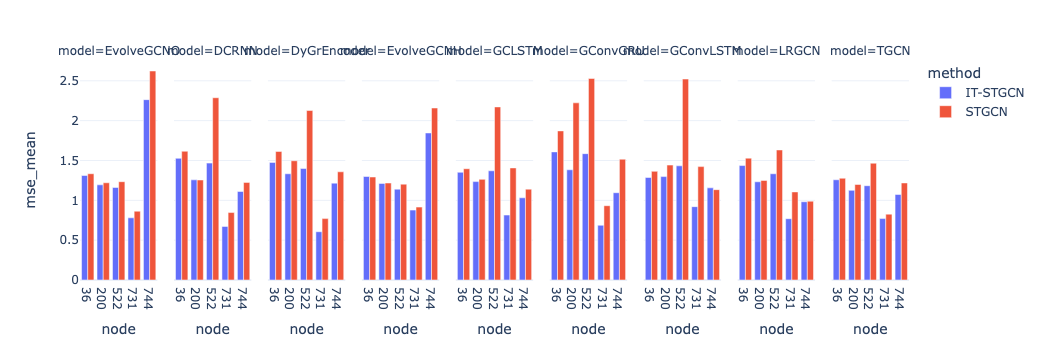

In [238]:
tidydata = df.query('mrate > 0.7').query('method != "GNAR" ')\
.groupby(['method','dataset','mrate','model','node','time']).agg({'mse':['mean','std']}).reset_index()\
.set_axis(['method','dataset','mrate','model','node','time','mse_mean','mse_std'],axis=1)\
.assign(node2 = lambda df: df['node']+np.random.randn(len(df))*df['mse_std']*10)\
.assign(time2 = lambda df: df['time']+np.random.randn(len(df))*df['mse_std']*10)\
.sort_values('time')\
.assign(node = lambda df: df['time'].apply(str))
#---#
px.bar(
    tidydata,
    x='node',y='mse_mean',
    color='method',
    barmode='group',
    facet_col='model'
)

# 시각화 

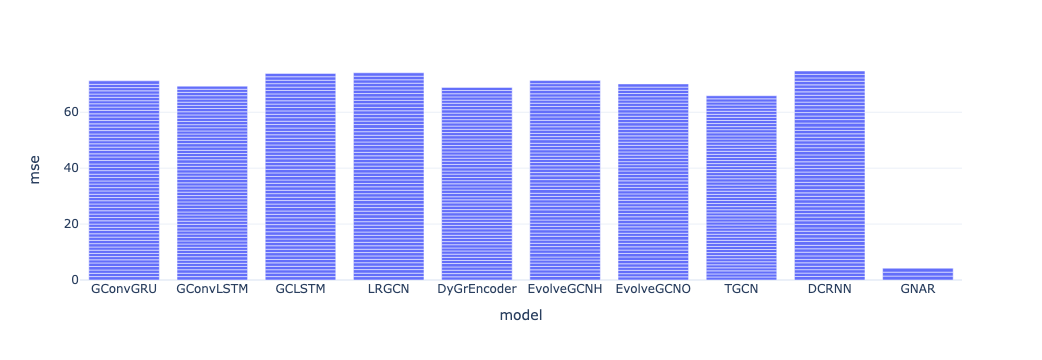

In [241]:
tidydata = df[(df['dataset'] == 'fivenodes') & (df['mtype'] == 'block')]
px.bar(
    tidydata,
    x='model',
    y='mse',
)

In [242]:
show_experiment_spec(tidydata)

{'lags': [2],
 'mtype': ['block'],
 'nof_filters': [12.0, 4.0, 2.0, nan],
 'inter_method': ['linear'],
 'epoch': [50.0, nan]}